In [1]:
#importing all relevant frameworks
import pandas as pd
import numpy as np


In [2]:
#load dataset
insurance = pd.read_csv('insurance.csv')
insurance.isnull().sum()

age         66
sex         66
bmi         66
children    66
smoker      66
region      66
charges     54
dtype: int64

In [3]:
#Task 1: Clean up the data

#Changing charges from object to float
insurance['charges'] = insurance['charges'].astype(str)
insurance['charges'] = insurance['charges'].str.replace(r'[^0-9.]', '', regex=True) #removing any non-numeric including a dot
insurance['charges'] = insurance['charges'].replace('', np.nan, regex=True)
insurance['charges'] = insurance['charges'].astype(float) #now i'm converting the new from string/object to float

#standarise region 
insurance['region'] = insurance['region'].str.strip().str.lower()

#removing all null values
insurance = insurance.dropna()

#no negative values in age column
insurance['age'] = np.abs(insurance['age'])
insurance['children'] = np.abs(insurance['children'])


#standarise sex:
Female = 'female'
Male = 'male'
sex_map = {'F' : Female, 'woman' : Female, 'M' : Male, 'man' : Male}
insurance['sex'] = insurance['sex'].replace(sex_map)


#Change smoker column to boolean
insurance['smoker'] = insurance['smoker'].map({'yes' : True, 'no' : False})

In [4]:
insurance.head(10)


,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,True,southwest,16884.92400
1,18.0,male,33.770,1.0,False,southeast,1725.55230
2,28.0,male,33.000,3.0,False,southeast,4449.46200
3,33.0,male,22.705,0.0,False,northwest,21984.47061
4,32.0,male,28.880,0.0,False,northwest,3866.85520
5,31.0,female,25.740,0.0,False,southeast,3756.62160
6,46.0,female,33.440,1.0,False,southeast,8240.58960
7,37.0,female,27.740,3.0,False,northwest,7281.50560
8,37.0,male,29.830,2.0,False,northeast,6406.41070
9,60.0,female,25.840,0.0,False,northwest,28923.13692


In [5]:
#Task 2: Exploratory Data Analysis (EDA) and Visualizations

import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Display basic statistics
print("Dataset Shape:", insurance.shape)
print("\nBasic Statistics:")
print(insurance.describe())
print("\nData Types:")
print(insurance.dtypes)


Dataset Shape: (1207, 7)

Basic Statistics:
               age          bmi     children       charges
count  1207.000000  1207.000000  1207.000000   1207.000000
mean     39.231152    30.574147     1.075394  13311.273947
std      14.075269     6.120031     1.203277  12136.057425
min      18.000000    15.960000     0.000000   1121.873900
25%      26.000000    26.190000     0.000000   4749.061450
50%      39.000000    30.210000     1.000000   9447.250350
75%      51.000000    34.580000     2.000000  16582.138605
max      64.000000    53.130000     5.000000  63770.428010

Data Types:
age         float64
sex          object
bmi         float64
children    float64
smoker         bool
region       object
charges     float64
dtype: object


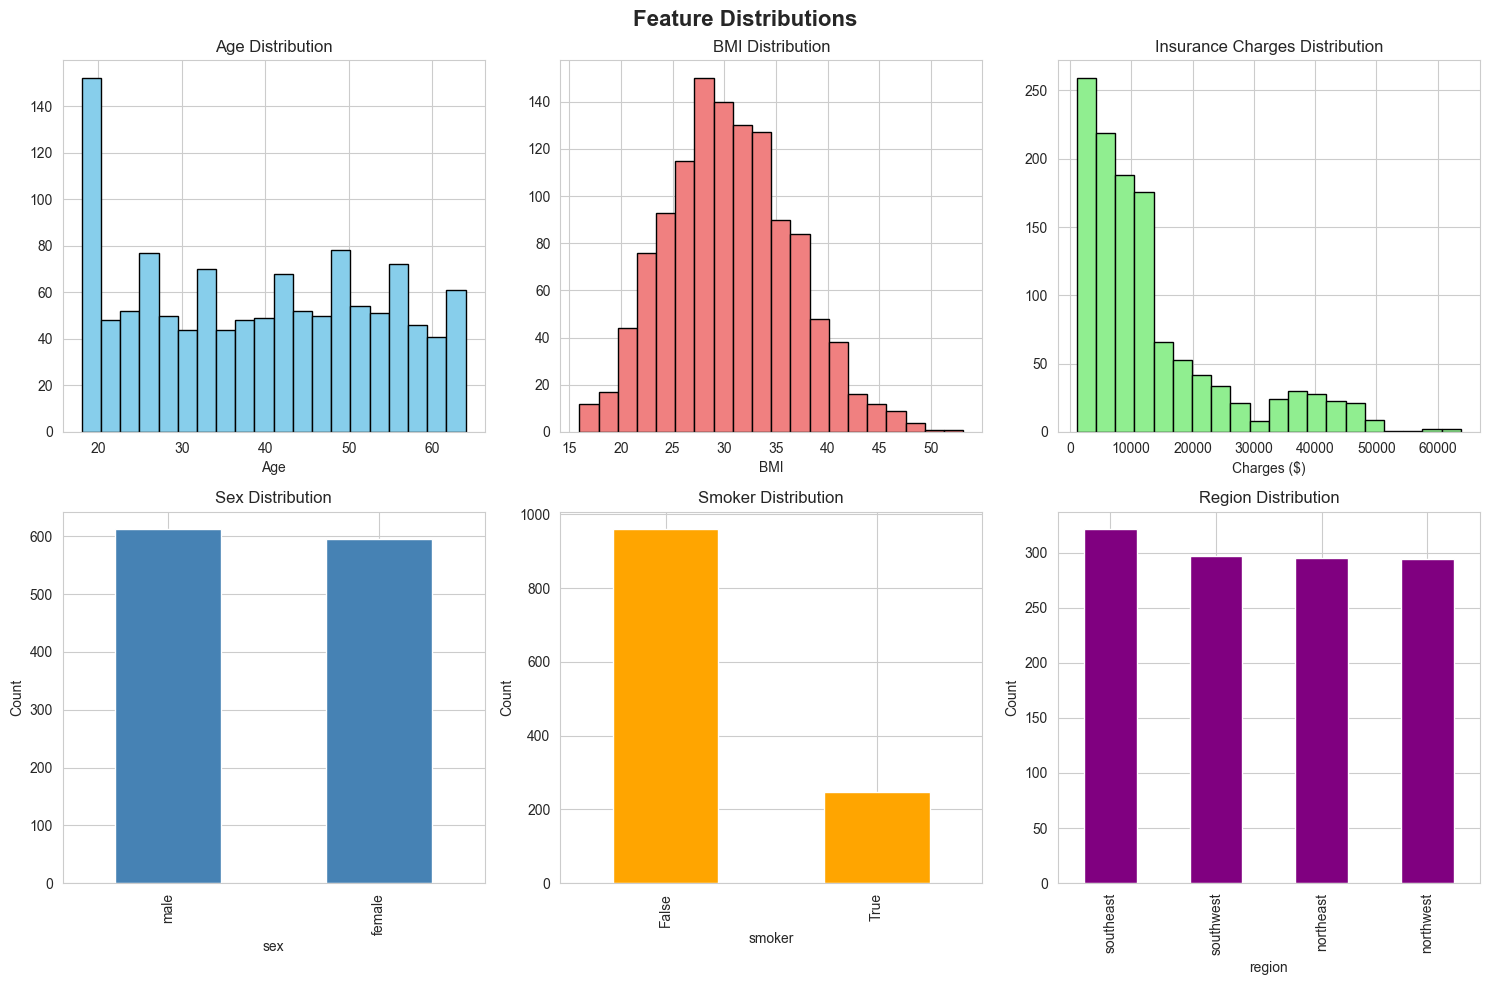

In [6]:
# Visualize distributions of key features
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Feature Distributions', fontsize=16, fontweight='bold')

axes[0, 0].hist(insurance['age'], bins=20, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')

axes[0, 1].hist(insurance['bmi'], bins=20, color='lightcoral', edgecolor='black')
axes[0, 1].set_title('BMI Distribution')
axes[0, 1].set_xlabel('BMI')

axes[0, 2].hist(insurance['charges'], bins=20, color='lightgreen', edgecolor='black')
axes[0, 2].set_title('Insurance Charges Distribution')
axes[0, 2].set_xlabel('Charges ($)')

# Count plots for categorical features
insurance['sex'].value_counts().plot(kind='bar', ax=axes[1, 0], color='steelblue')
axes[1, 0].set_title('Sex Distribution')
axes[1, 0].set_ylabel('Count')

insurance['smoker'].value_counts().plot(kind='bar', ax=axes[1, 1], color='orange')
axes[1, 1].set_title('Smoker Distribution')
axes[1, 1].set_ylabel('Count')

insurance['region'].value_counts().plot(kind='bar', ax=axes[1, 2], color='purple')
axes[1, 2].set_title('Region Distribution')
axes[1, 2].set_ylabel('Count')

plt.tight_layout()
plt.show()


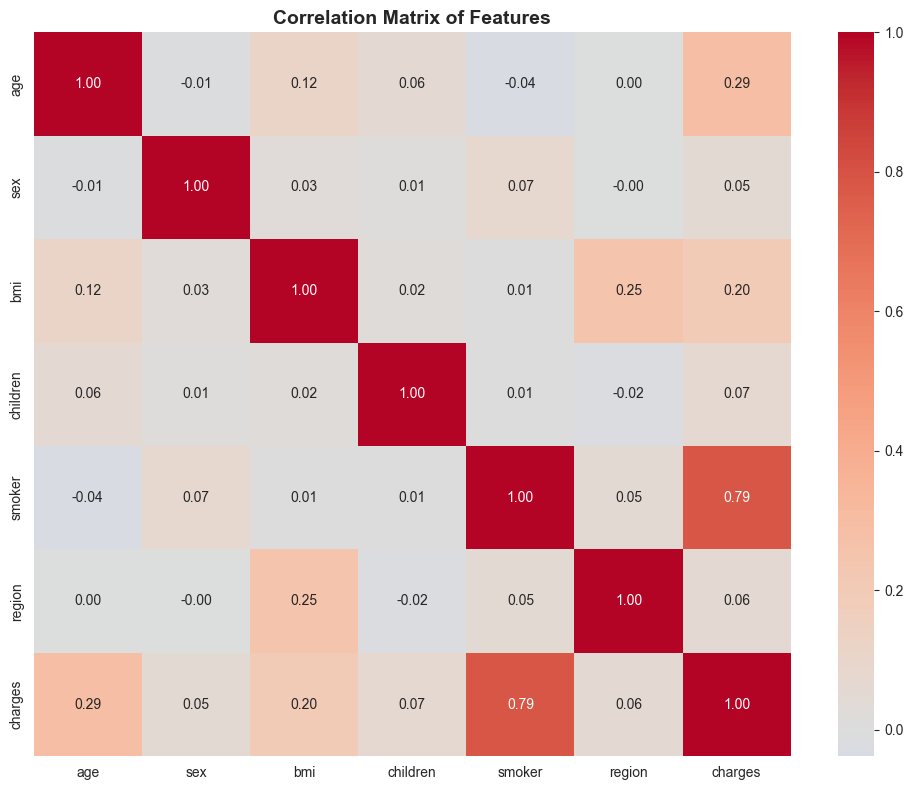


Correlation with Charges:
charges     1.000000
smoker      0.785997
age         0.291875
bmi         0.199039
children    0.071256
region      0.059129
sex         0.051080
Name: charges, dtype: float64


In [7]:
# Correlation Analysis
# Encode categorical variables for correlation
insurance_encoded = insurance.copy()
insurance_encoded['sex'] = insurance_encoded['sex'].map({'female': 0, 'male': 1})
insurance_encoded['smoker'] = insurance_encoded['smoker'].astype(int)
insurance_encoded['region'] = insurance_encoded['region'].map({
    'northwest': 0, 'northeast': 1, 'southwest': 2, 'southeast': 3
})

# Correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = insurance_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nCorrelation with Charges:")
print(correlation_matrix['charges'].sort_values(ascending=False))


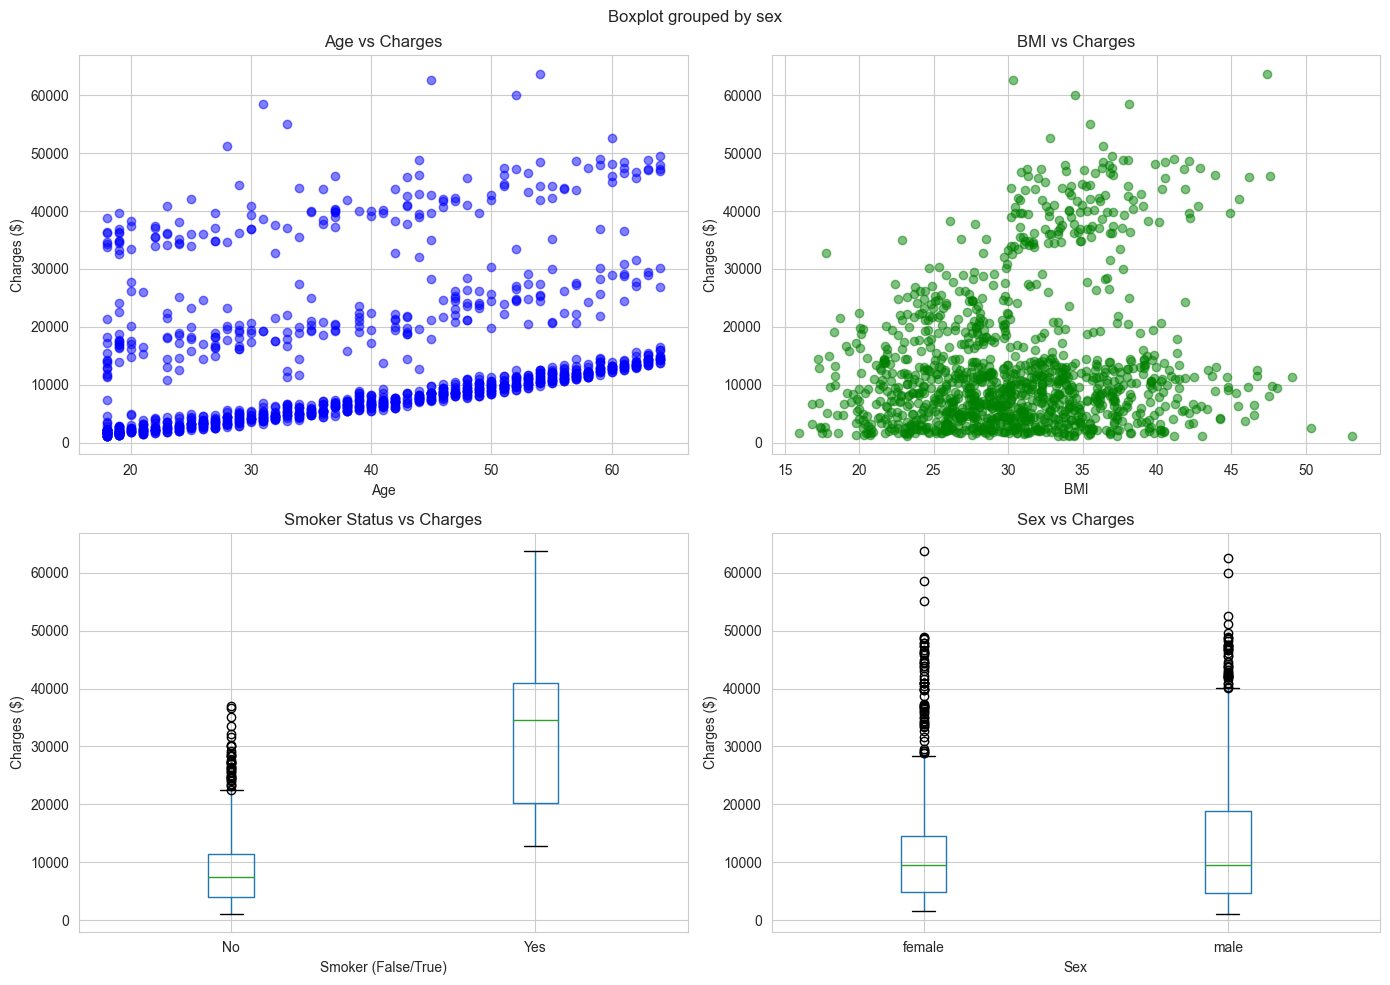

In [8]:
# Key Relationships Visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Key Relationships with Insurance Charges', fontsize=16, fontweight='bold')

# Age vs Charges
axes[0, 0].scatter(insurance['age'], insurance['charges'], alpha=0.5, color='blue')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Charges ($)')
axes[0, 0].set_title('Age vs Charges')

# BMI vs Charges
axes[0, 1].scatter(insurance['bmi'], insurance['charges'], alpha=0.5, color='green')
axes[0, 1].set_xlabel('BMI')
axes[0, 1].set_ylabel('Charges ($)')
axes[0, 1].set_title('BMI vs Charges')

# Smoker vs Charges (Box plot)
insurance.boxplot(column='charges', by='smoker', ax=axes[1, 0])
axes[1, 0].set_xlabel('Smoker (False/True)')
axes[1, 0].set_ylabel('Charges ($)')
axes[1, 0].set_title('Smoker Status vs Charges')
plt.sca(axes[1, 0])
plt.xticks([1, 2], ['No', 'Yes'])

# Sex vs Charges (Box plot)
insurance.boxplot(column='charges', by='sex', ax=axes[1, 1])
axes[1, 1].set_xlabel('Sex')
axes[1, 1].set_ylabel('Charges ($)')
axes[1, 1].set_title('Sex vs Charges')

plt.tight_layout()
plt.show()


In [9]:
#Task 3: Feature Engineering and Model Building

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Prepare data for modeling
X = insurance_encoded.drop('charges', axis=1)
y = insurance_encoded['charges']

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFeatures have been standardized for model training")


Training set size: 965
Testing set size: 242

Features have been standardized for model training


In [10]:
# Build and Train Multiple Models

models = {}

# 1. Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
models['Linear Regression'] = lr_model

# 2. Ridge Regression
ridge_model = Ridge(alpha=10.0, random_state=42)
ridge_model.fit(X_train_scaled, y_train)
models['Ridge Regression'] = ridge_model

# 3. Lasso Regression
lasso_model = Lasso(alpha=100.0, random_state=42)
lasso_model.fit(X_train_scaled, y_train)
models['Lasso Regression'] = lasso_model

# 4. Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
models['Random Forest'] = rf_model

# 5. Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
models['Gradient Boosting'] = gb_model

print("✓ All models trained successfully!")


✓ All models trained successfully!


In [11]:
#Task 4: Model Evaluation and Comparison

# Evaluate models
results = {}

for model_name, model in models.items():
    # Make predictions
    if model_name in ['Linear Regression', 'Ridge Regression', 'Lasso Regression']:
        y_pred = model.predict(X_test_scaled)
    else:
        y_pred = model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[model_name] = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2,
        'Predictions': y_pred
    }
    
    print(f"\n{model_name}:")
    print(f"  RMSE: ${rmse:.2f}")
    print(f"  MAE: ${mae:.2f}")
    print(f"  R² Score: {r2:.4f}")

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'RMSE': [results[m]['RMSE'] for m in results.keys()],
    'MAE': [results[m]['MAE'] for m in results.keys()],
    'R² Score': [results[m]['R2'] for m in results.keys()]
})

print("\n" + "="*70)
print("MODEL COMPARISON SUMMARY")
print("="*70)
print(comparison_df.to_string(index=False))

# Find best model
best_model_name = comparison_df.loc[comparison_df['R² Score'].idxmax(), 'Model']
print(f"\n🏆 Best Model: {best_model_name} (R² = {comparison_df['R² Score'].max():.4f})")



Linear Regression:
  RMSE: $6329.83
  MAE: $4395.49
  R² Score: 0.7040

Ridge Regression:
  RMSE: $6318.56
  MAE: $4402.46
  R² Score: 0.7050

Lasso Regression:
  RMSE: $6313.03
  MAE: $4371.04
  R² Score: 0.7055

Random Forest:
  RMSE: $4910.03
  MAE: $2854.83
  R² Score: 0.8219

Gradient Boosting:
  RMSE: $4678.79
  MAE: $2721.41
  R² Score: 0.8383

MODEL COMPARISON SUMMARY
            Model        RMSE         MAE  R² Score
Linear Regression 6329.830404 4395.485596  0.703971
 Ridge Regression 6318.560724 4402.457111  0.705024
 Lasso Regression 6313.029509 4371.042049  0.705540
    Random Forest 4910.026368 2854.830982  0.821878
Gradient Boosting 4678.792985 2721.411399  0.838260

🏆 Best Model: Gradient Boosting (R² = 0.8383)


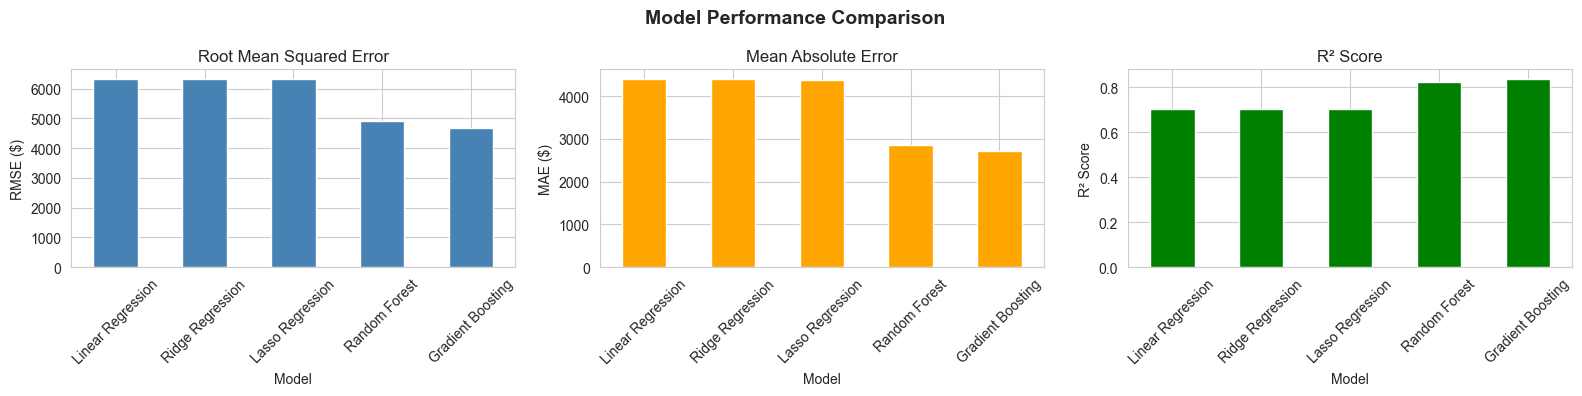

In [12]:
# Visualization of Model Performance
fig, axes = plt.subplots(1, 3, figsize=(16, 4))
fig.suptitle('Model Performance Comparison', fontsize=14, fontweight='bold')

# RMSE comparison
comparison_df.plot(x='Model', y='RMSE', kind='bar', ax=axes[0], color='steelblue', legend=False)
axes[0].set_title('Root Mean Squared Error')
axes[0].set_ylabel('RMSE ($)')
axes[0].tick_params(axis='x', rotation=45)

# MAE comparison
comparison_df.plot(x='Model', y='MAE', kind='bar', ax=axes[1], color='orange', legend=False)
axes[1].set_title('Mean Absolute Error')
axes[1].set_ylabel('MAE ($)')
axes[1].tick_params(axis='x', rotation=45)

# R² comparison
comparison_df.plot(x='Model', y='R² Score', kind='bar', ax=axes[2], color='green', legend=False)
axes[2].set_title('R² Score')
axes[2].set_ylabel('R² Score')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


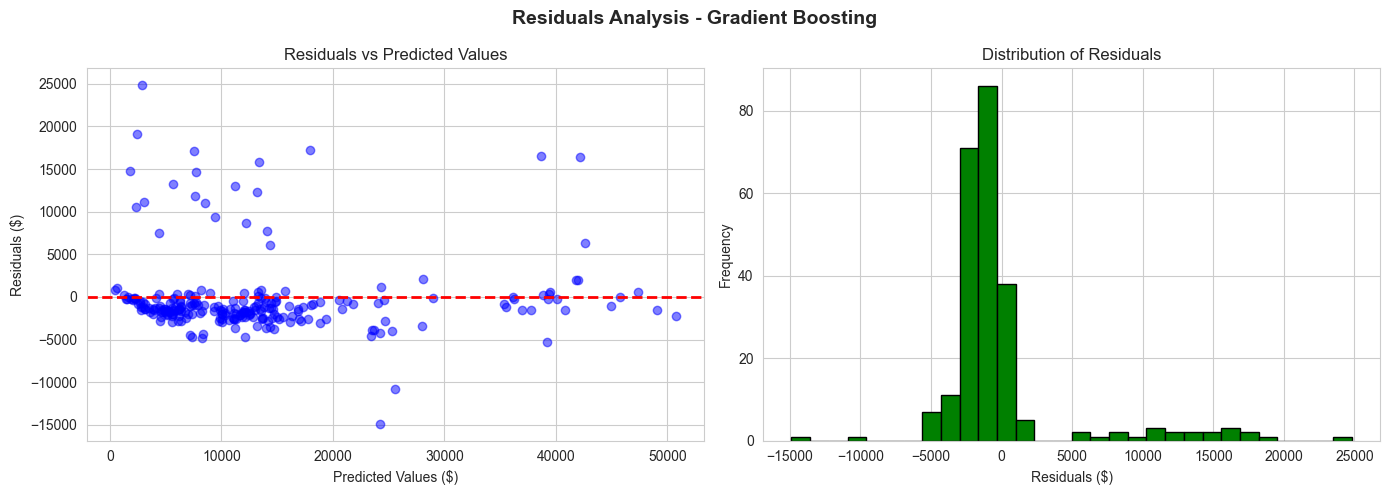

Mean of Residuals: $-230.23
Std Dev of Residuals: $4682.81


In [13]:
# Residuals Analysis for Best Model
best_predictions = results[best_model_name]['Predictions']
residuals = y_test - best_predictions

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle(f'Residuals Analysis - {best_model_name}', fontsize=14, fontweight='bold')

# Residuals scatter plot
axes[0].scatter(best_predictions, residuals, alpha=0.5, color='blue')
axes[0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0].set_xlabel('Predicted Values ($)')
axes[0].set_ylabel('Residuals ($)')
axes[0].set_title('Residuals vs Predicted Values')

# Residuals histogram
axes[1].hist(residuals, bins=30, color='green', edgecolor='black')
axes[1].set_xlabel('Residuals ($)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Residuals')

plt.tight_layout()
plt.show()

print(f"Mean of Residuals: ${residuals.mean():.2f}")
print(f"Std Dev of Residuals: ${residuals.std():.2f}")


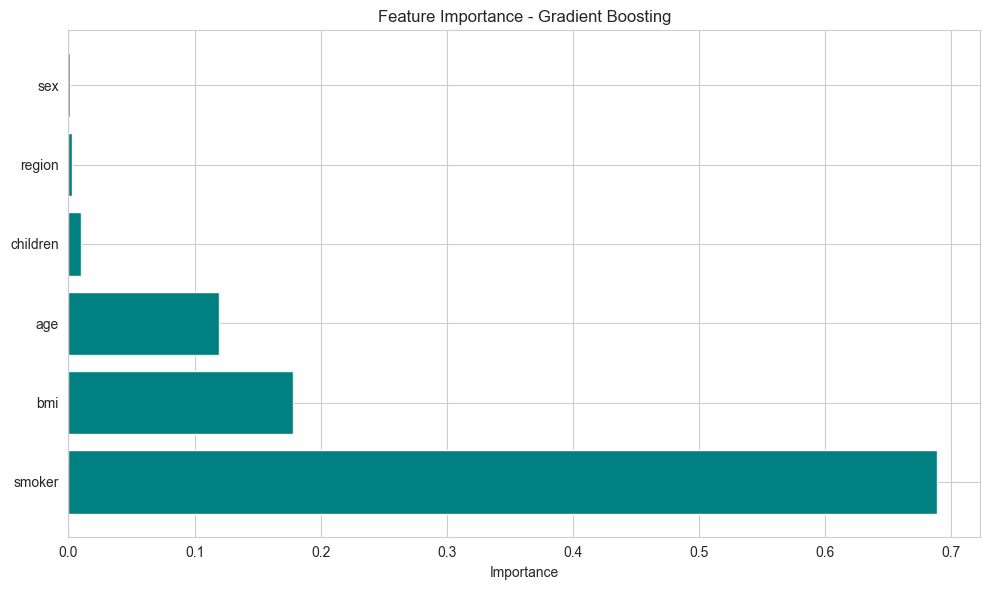


Feature Importance:
    Feature  Importance
4    smoker    0.688448
2       bmi    0.178109
0       age    0.119392
3  children    0.010005
5    region    0.003184
1       sex    0.000862


In [14]:
# Feature Importance for Tree-based models
if best_model_name == 'Random Forest':
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': models[best_model_name].feature_importances_
    }).sort_values('Importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='teal')
    plt.xlabel('Importance')
    plt.title(f'Feature Importance - {best_model_name}')
    plt.tight_layout()
    plt.show()
    
    print("\nFeature Importance:")
    print(feature_importance)
elif best_model_name == 'Gradient Boosting':
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': models[best_model_name].feature_importances_
    }).sort_values('Importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='teal')
    plt.xlabel('Importance')
    plt.title(f'Feature Importance - {best_model_name}')
    plt.tight_layout()
    plt.show()
    
    print("\nFeature Importance:")
    print(feature_importance)


In [ ]:
# Task 5: Save the Best Model for Deployment

import pickle

# Save the best model and scaler
best_model = models[best_model_name]

# Save model
with open('model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

# Save scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print(f"✓ Best model ({best_model_name}) saved as 'model.pkl'")
print(f"✓ Scaler saved as 'scaler.pkl'")
print(f"\nModel is ready for production deployment!")


NameError: name 'validation' is not defined

In [ ]:
# Actual vs Predicted Visualization (Test Set)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle(f'Prediction Accuracy - {best_model_name}', fontsize=14, fontweight='bold')

# Scatter plot: Actual vs Predicted
axes[0].scatter(y_test, best_predictions, alpha=0.5, color='blue', s=50)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Charges ($)', fontsize=11)
axes[0].set_ylabel('Predicted Charges ($)', fontsize=11)
axes[0].set_title('Actual vs Predicted (Test Set)')
axes[0].grid(True, alpha=0.3)
axes[0].legend()

# Prediction error distribution
errors = np.abs(y_test - best_predictions)
axes[1].hist(errors, bins=30, color='green', edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Absolute Prediction Error ($)', fontsize=11)
axes[1].set_ylabel('Frequency', fontsize=11)
axes[1].set_title('Prediction Error Distribution')
axes[1].axvline(errors.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean Error: ${errors.mean():.2f}')
axes[1].legend()

plt.tight_layout()
plt.show()

print(f"\n✓ Model Performance Summary:")
print(f"  Best Model: {best_model_name}")
print(f"  Mean Absolute Error: ${errors.mean():.2f}")
print(f"  Max Error: ${errors.max():.2f}")
print(f"  R² Score: {results[best_model_name]['R2']:.4f}")
print(f"\n✓ Model is ready for deployment!")
